# MiTH 2 :  Tax Dataset

Predict assessed property value for the purpose of property tax assessment
I.Problem Description
Predict assessed property value for the purpose of property tax assessment
Here, we have data of properties collected by a Municipal Council for the purpose of
computation of assessed value and assessment of property tax within the framework of state
laws. An individual tax lot may range from multiple buildings to just one residential or
commercial unit in a condominium.
Assessed value depends on the variables such as location, building class for understanding
constructive use, area (land and/or buildup), year of construction etc. Location can be
measured by certain data elements like ZIP code, longitudinal, latitudinal measures etc.
Hint : Please refer to the online resources to get the building class category details for the
specific state.
The Municipal council is facing the problem of many citizens challenging the assessment of
property taxes and is criticized for complicated assessment procedure system as well as
multiple required filings throughout the year to challenge one’s assessment. Therefore, the
Council wants to rationalise the tax assessment system. They also want to structure benefit
programs based on certain variables of statistical significance to incentivise additional
construction activity or activity of conversion/modification of properties for reducing tax
burden and/or to make the contemplated projects more economically feasible.
Therefore the idea is to achieve consistent, rational and objective assessment of properties
based on a predictive model by automating the property valuation process to reduce the
unfairness within the tax system.
You are expected to create an analytical and modelling framework to predict the property evaluation value
based on the quantitative and qualitative features provided in the dataset while answering other questions too
cited below.
II.The datasets are provided as cited below for forecasting the value of
building asset:
1. Data :
i. Train.xlsx (To build the model and tune the model & visualization)
ii. Test.xlsx (Model will be tested on this dataset in tool)
Target attribute : "PropertyEvaluationvalue"


#### Defining Functions

In [249]:
## Defining Functions for error metrics, mean absolute percentage error and coefficients

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#defining MAPE

from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test','R^2'])


#definition of error metrics function
def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = mean_absolute_percentage_error(test_act,test_pred)
    R2=metrics.r2_score(train_act,train_pred)
    s1=pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2],
                                           index=scores.columns)
    dataframe = dataframe.append(s1, ignore_index=True)
    return(dataframe)

def coeff(model_title,modelparams):
    tempdf=pd.DataFrame(modelparams)
    tempdf.rename(columns = {0:model_title},inplace = True)
    DF=pd.concat([coefficients,tempdf],axis=1)
    return(DF) 

#definition of residual plots function
from scipy import stats
def residual_plots(results):
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    from statsmodels.nonparametric.smoothers_lowess import lowess
    from scipy import stats
    import statsmodels.api as sm
    
    
    fig, ax = plt.subplots(2,2,figsize=(14,10))
    
    ########## Residuals vs fitted - linearity of Errors ##########
    residuals = results.resid
    fitted = results.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (8,7)
    
    ax[0,0].scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
    ax[0,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[0,0].set_ylabel('Residuals')
    ax[0,0].set_xlabel('Fitted Values')
    ax[0,0].set_title('Residuals vs. Fitted')
    ax[0,0].plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax[0,0].annotate(i,xy=(fitted[i],residuals[i]))

    #plt.show()
    
    
    ######### qq plot - Normality of Errors ###########
    sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    sorted_student_residuals.index = results.resid.index
    sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
    df = pd.DataFrame(sorted_student_residuals)
    df.columns = ['sorted_student_residuals']
    df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
    rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
    top3 = rankings[:3]

    #fig, ax = plt.subplots()
    x = df['theoretical_quantiles']
    y = df['sorted_student_residuals']
    ax[0,1].scatter(x,y, edgecolor = 'k',facecolor = 'none')
    ax[0,1].set_title('Normal Q-Q')
    ax[0,1].set_ylabel('Standardized Residuals')
    ax[0,1].set_xlabel('Theoretical Quantiles')
    ax[0,1].plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
    for val in top3.index:
        ax[0,1].annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
    #plt.show()
    
    
    ######### Homoscedasticity - Errors Constant Variance ############
    student_residuals = results.get_influence().resid_studentized_internal
    sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
    sqrt_student_residuals.index = results.resid.index
    smoothed = lowess(sqrt_student_residuals,fitted)
    top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

    #fig, ax = plt.subplots()
    ax[1,0].scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
    ax[1,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,0].set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
    ax[1,0].set_xlabel('Fitted Values')
    ax[1,0].set_title('Scale-Location')
    ax[1,0].set_ylim(0,max(sqrt_student_residuals)+0.1)
    for i in top3.index:
        ax[1,0].annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
    #plt.show()
    
    
    ######### Cooks distance  - Influential Points ###########
    student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    student_residuals.index = results.resid.index
    df = pd.DataFrame(student_residuals)
    df.columns = ['student_residuals']
    df['leverage'] = results.get_influence().hat_matrix_diag
    smoothed = lowess(df['student_residuals'],df['leverage'])
    sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
    top3 = sorted_student_residuals[:3]

    #fig, ax = plt.subplots()
    x = df['leverage']
    y = df['student_residuals']
    xpos = max(x)+max(x)*0.01  
    ax[1,1].scatter(x, y, edgecolors = 'k', facecolors = 'none')
    ax[1,1].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[1,1].set_ylabel('Studentized Residuals')
    ax[1,1].set_xlabel('Leverage')
    ax[1,1].set_title('Residuals vs. Leverage')
    ax[1,1].set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
    ax[1,1].set_xlim(-0.01,max(x)+max(x)*0.05)
    plt.tight_layout()
    for val in top3.index:
        ax[1,1].annotate(val,xy=(x.loc[val],y.loc[val]))

    cooksx = np.linspace(min(x), xpos, 50)
    p = len(results.params)
    poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
    poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
    negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
    negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

    ax[1,1].plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
    ax[1,1].plot(cooksx,poscooks05y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks1y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks05y, ls = ':', color = 'r')
    ax[1,1].plot([0,0],ax[1,1].get_ylim(), ls=":", alpha = .3, color = 'k')
    ax[1,1].plot(ax[1,1].get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
    ax[1,1].annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
    ax[1,1].annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
    ax[1,1].legend()
    plt.show()

#### IMPORT 

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
import os
import sklearn
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm # import stats model o/p : R model
from sklearn.model_selection import train_test_split # importing neccessary modules

In [178]:
ptrain = pd.read_excel("Train-1665386529049.xlsx")
ptest =  pd.read_excel("Test-1665386517573.xlsx")

In [179]:
ptrain

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,PR27906,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,2803,2004,2,R4,2014-11-30,8454562
16806,PR27907,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2252,2003,2,R4,2014-12-19,6250000
16807,PR27908,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2177,2003,2,R4,2014-11-16,7150000
16808,PR27909,4,NY,TRIBECA,250 SOUTH END AVENUE,10280,16,2249,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12644,594,1981,2,R4,2014-09-17,550000


In [180]:
ptrain.describe(include = 'O')

,PropertyID,State,Surroundings,Address,BldgClassCategory,BldgClass_AtEvaluationTime
count,16810,16810,16810,16810,16810,16810
unique,16810,1,243,15219,52,101
top,PR11101,NY,FLUSHING-NORTH,102 WEST 57TH STREET,01 ONE FAMILY DWELLINGS,A5
freq,1,16810,801,102,4272,3454


In [181]:
ptrain.describe()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
count,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,1.681000e+04,1.681000e+04,16810.000000,16810.000000,1.681000e+04
mean,3.439143,10871.027543,5428.122308,266.327722,1.862225,0.137775,2.000000,1.092492e+04,3.612157e+03,1973.982867,1.289530,8.084101e+05
std,1.398950,522.996869,3710.031921,542.420132,8.027805,2.185857,8.472771,5.837620e+04,1.627378e+04,23.632595,0.713779,8.978317e+05
min,1.000000,10001.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1941.000000,1.000000,1.000440e+05
25%,2.000000,10312.000000,2401.250000,25.000000,1.000000,0.000000,1.000000,2.100000e+03,1.224000e+03,1951.000000,1.000000,4.250000e+05
50%,3.000000,11207.000000,5050.000000,52.000000,1.000000,0.000000,1.000000,3.200000e+03,1.750000e+03,1968.000000,1.000000,5.900000e+05
75%,5.000000,11364.000000,7376.750000,138.000000,2.000000,0.000000,2.000000,5.000000e+03,2.449750e+03,1998.000000,1.000000,8.450000e+05
max,5.000000,11694.000000,16314.000000,5323.000000,437.000000,252.000000,437.000000,5.612000e+06,1.172005e+06,2012.000000,4.000000,9.935000e+06


In [182]:
ptrain['TaxClass_AtEvaluationTime'].nunique()

3

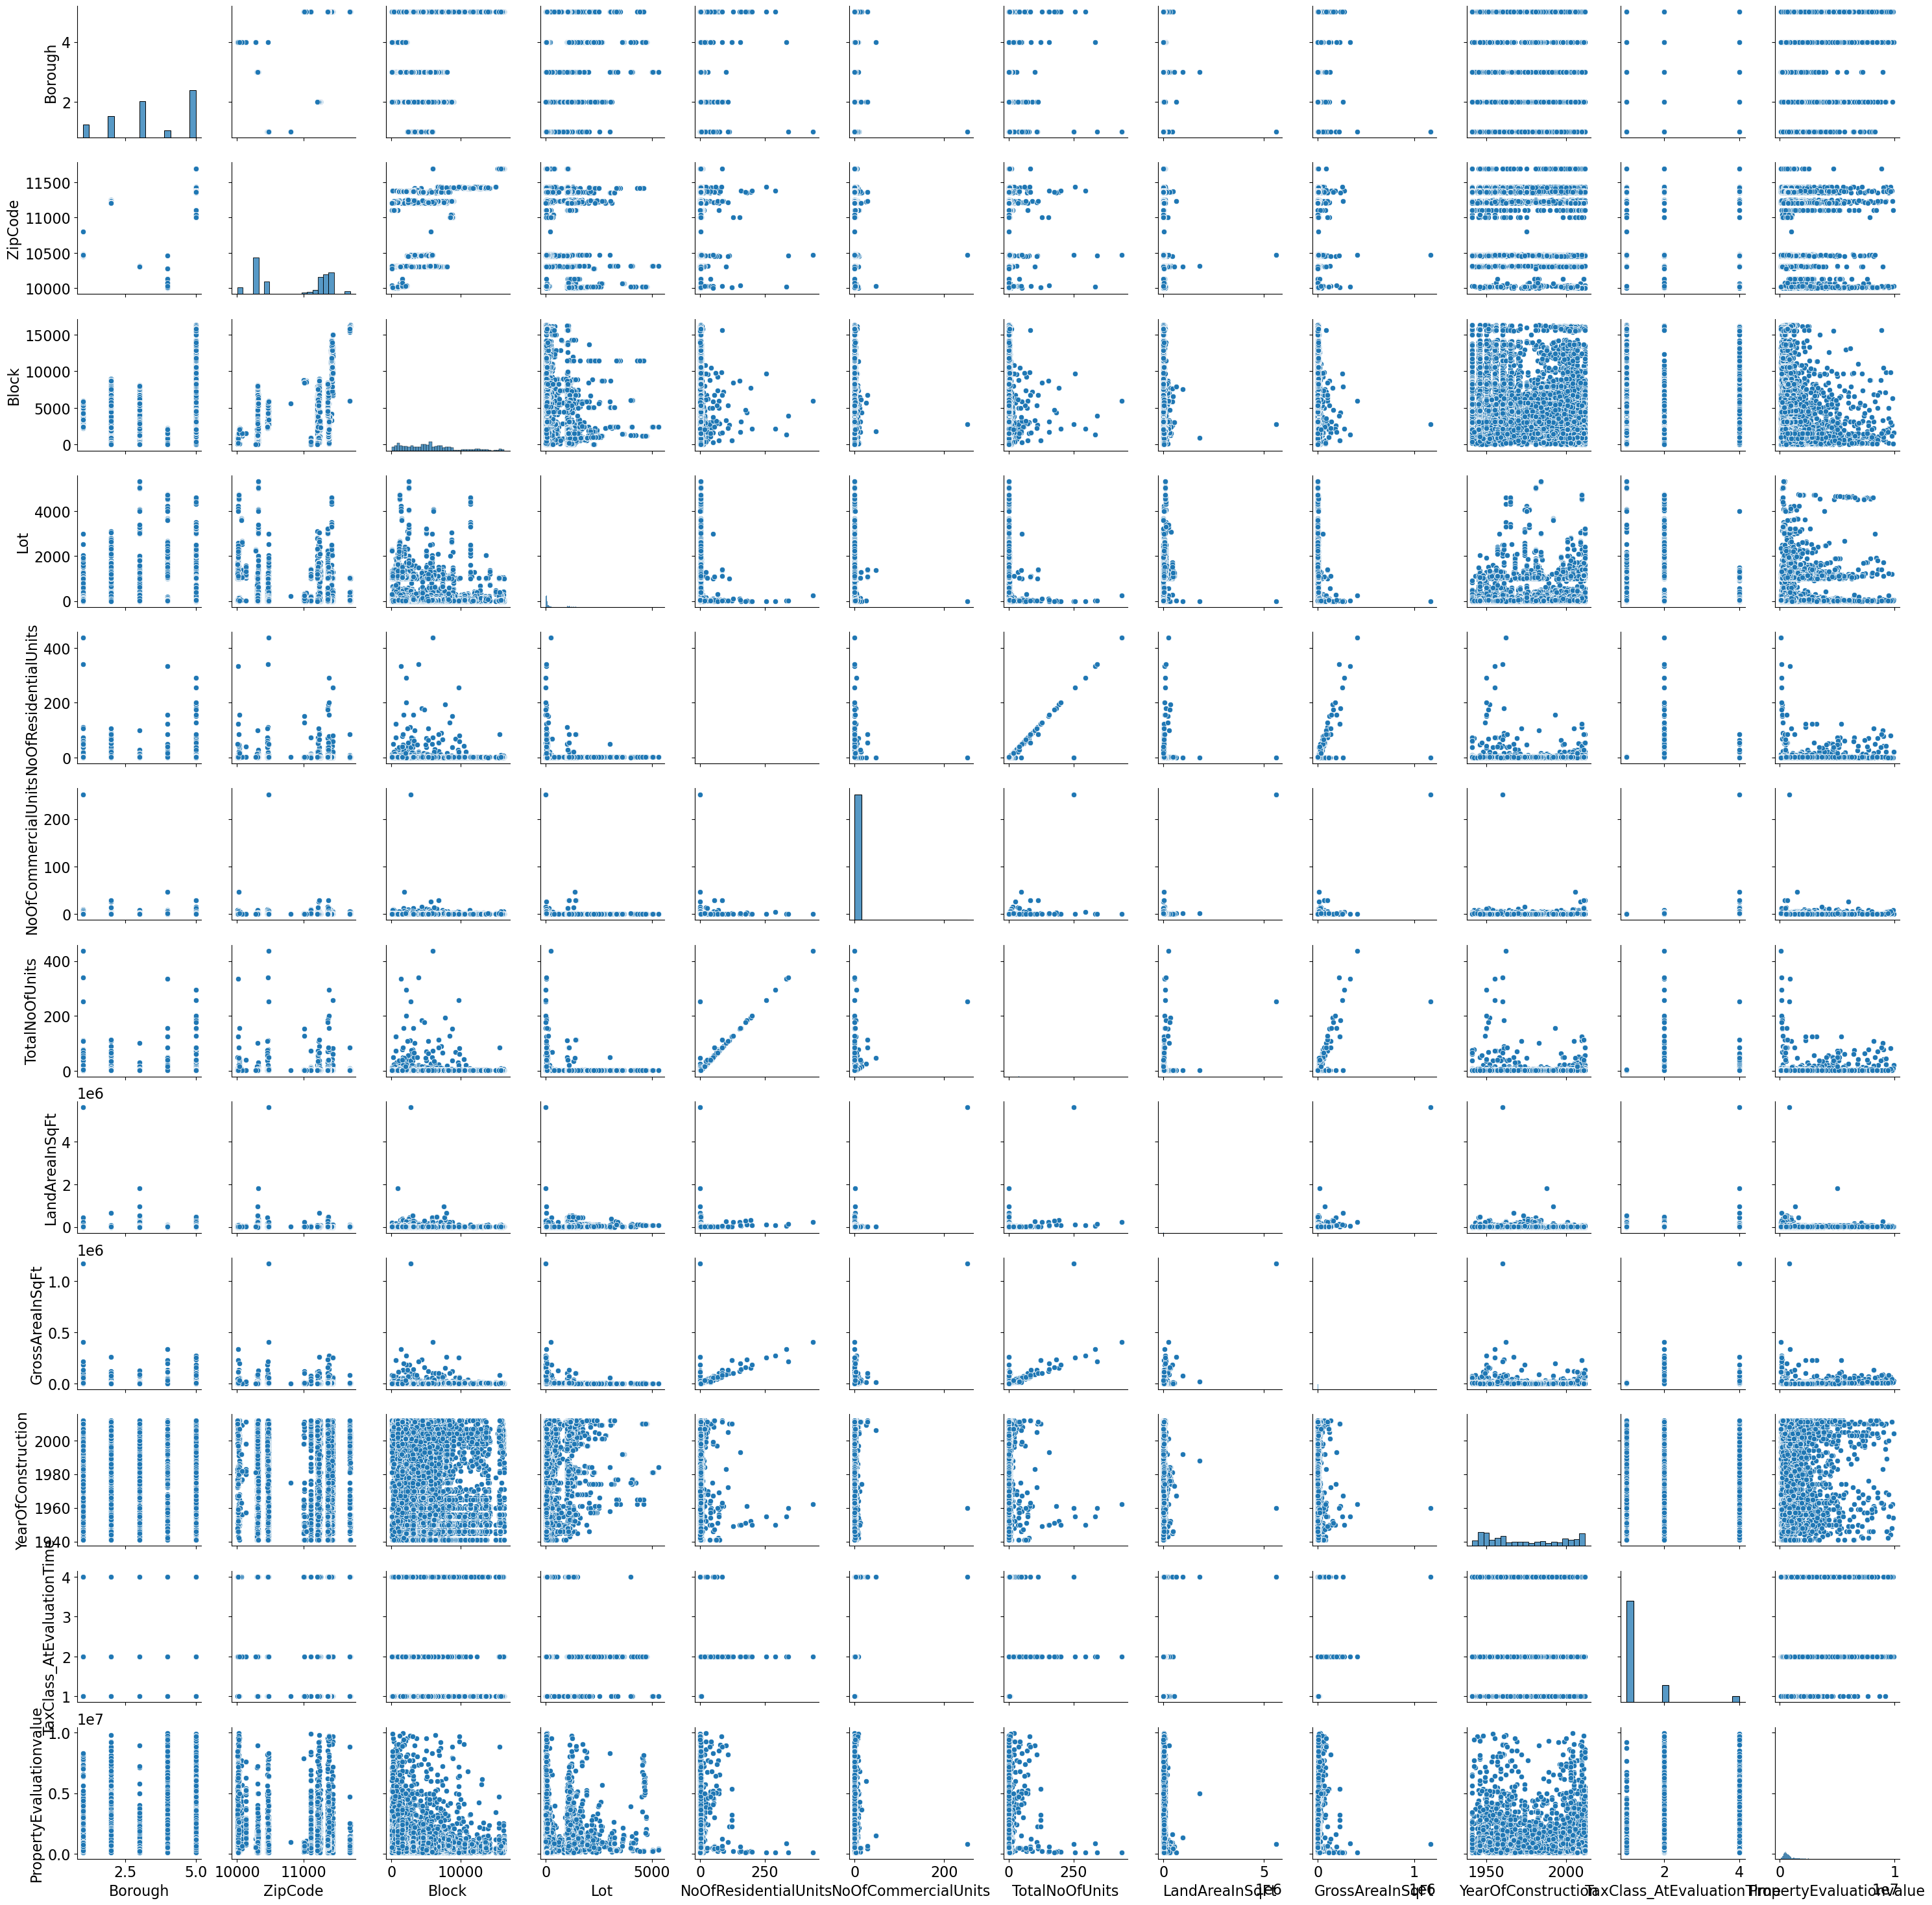

In [183]:
import seaborn
seaborn.pairplot(ptrain)

In [184]:
ptrain['State'].nunique()

1

#### State is a single value ie New York hence Dropping it
#### Address is incosistent and non reliable data hence dropping that as well 


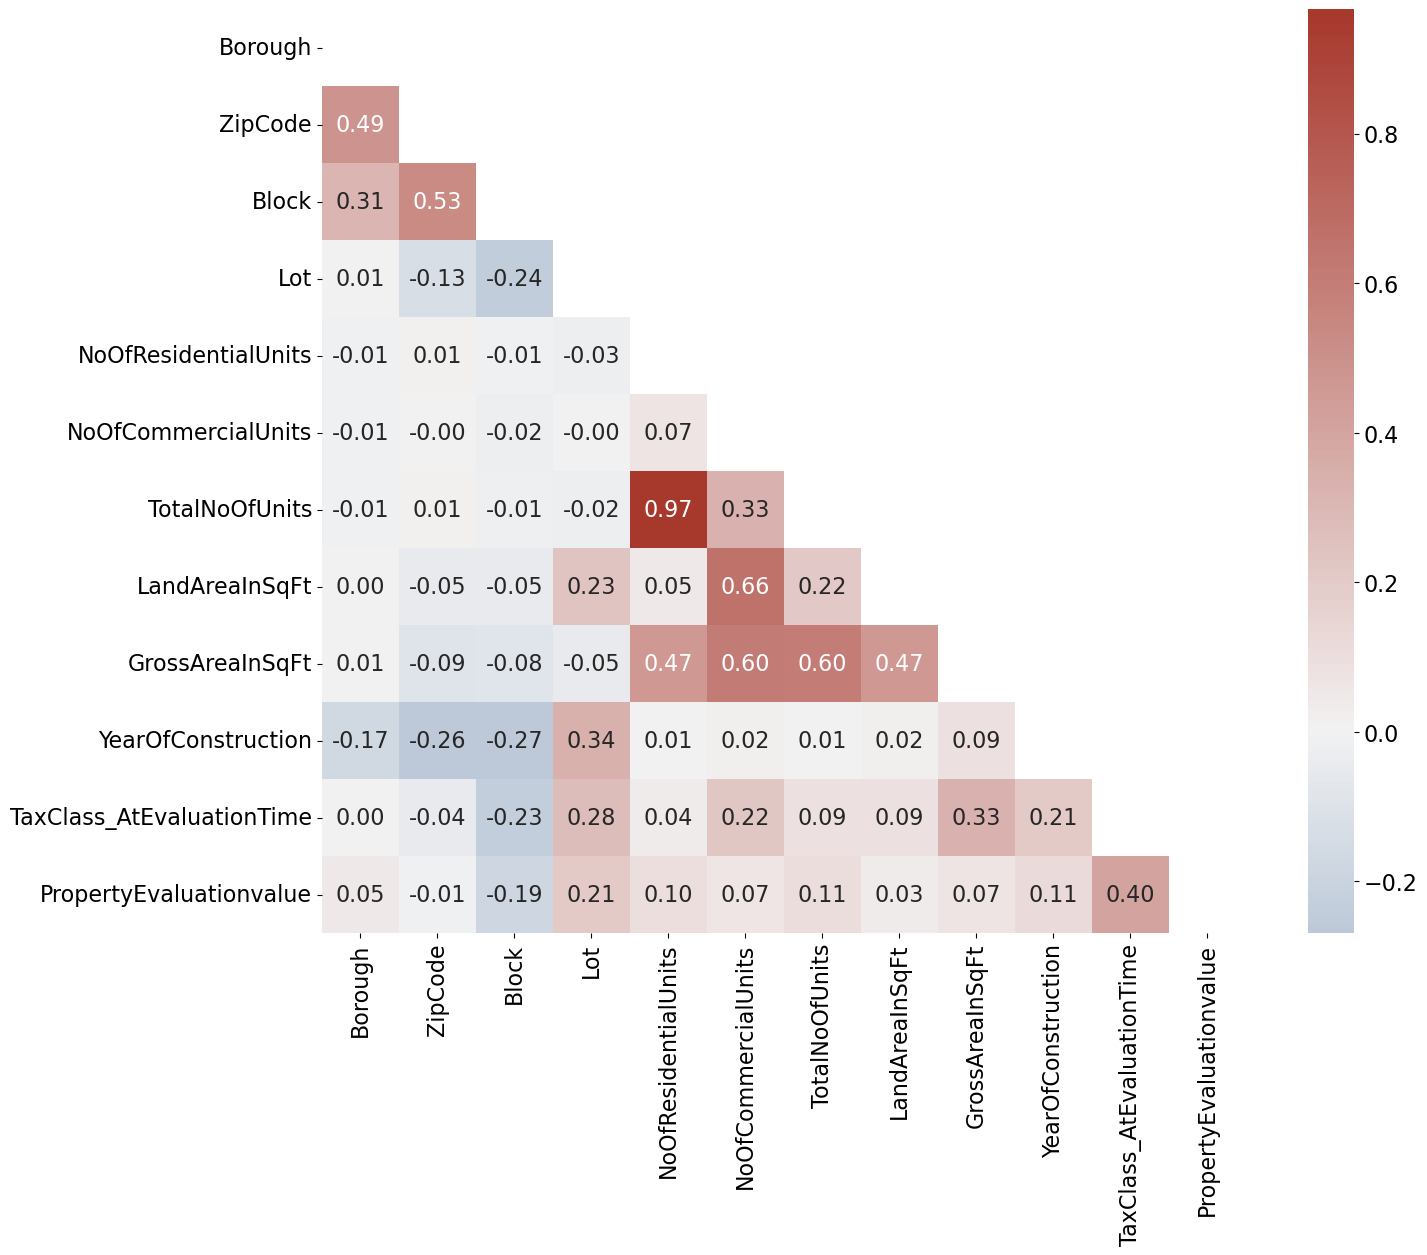

In [185]:


## Corelation Plot

matrix = ptrain.corr()
# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="light", as_cmap=True)
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, mask=mask, center=0, annot=True,fmt='.2f', square=True, cmap=cmap)
plt.show()

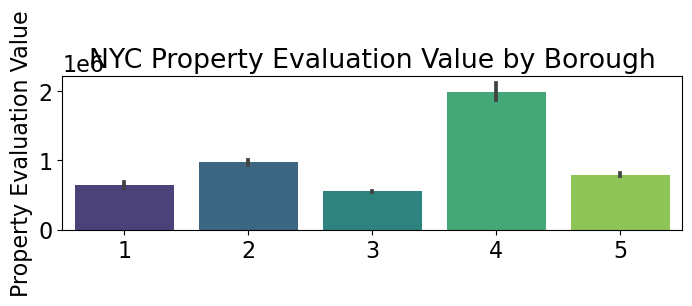

In [253]:
plt.figure(figsize=(8,2))
sns.barplot(x='Borough', y='PropertyEvaluationvalue', data=ptrain, palette='viridis')
plt.xlabel('')
plt.ylabel('Property Evaluation Value')
plt.title('NYC Property Evaluation Value by Borough')
plt.show()

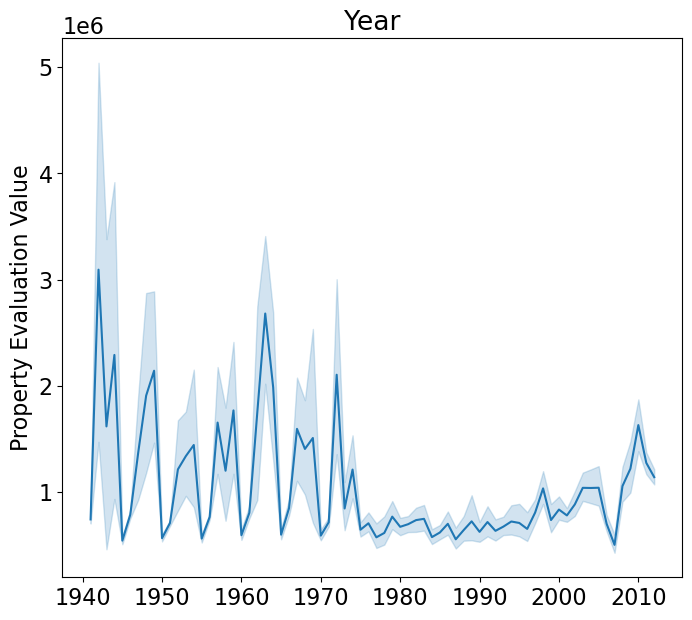

In [261]:
plt.figure()
sns.lineplot(x='YearOfConstruction', y='PropertyEvaluationvalue', data=ptrain, palette='viridis')
plt.xlabel('')
plt.ylabel('Property Evaluation Value')
plt.title('Year')
plt.show()

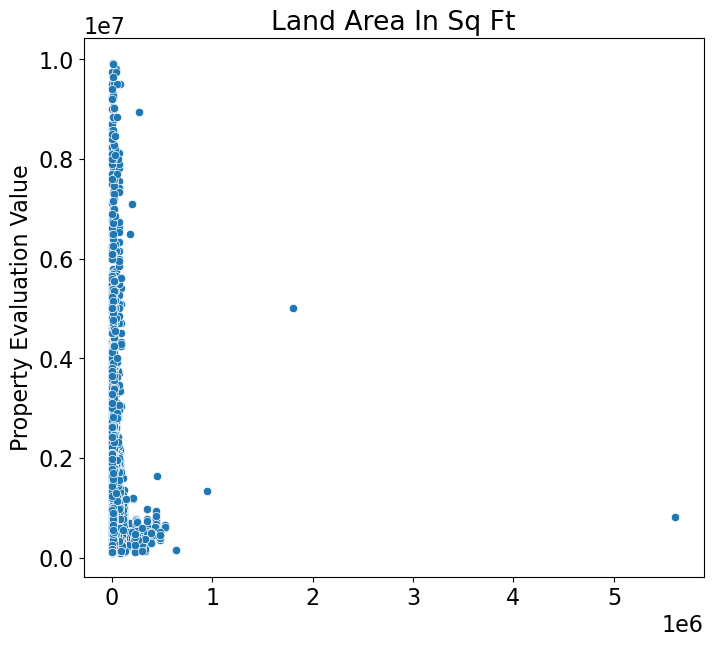

In [266]:
plt.figure()
sns.scatterplot(x='LandAreaInSqFt', y='PropertyEvaluationvalue', data=ptrain, palette='viridis')
plt.xlabel('')
plt.ylabel('Property Evaluation Value')
plt.title('Land Area In Sq Ft')
plt.show()

#### No of Residential Units + No of Commercial units = Total no Of Units... This results in multicolleniarity hence we are dropping Total No of Units 

In [186]:
tryp = ptrain
proptr = ptrain.drop(['State','Address','TotalNoOfUnits'], axis= 1)

In [187]:
ptrain.dtypes

PropertyID                            object
Borough                                int64
State                                 object
Surroundings                          object
Address                               object
ZipCode                                int64
Block                                  int64
Lot                                    int64
BldgClassCategory                     object
NoOfResidentialUnits                   int64
NoOfCommercialUnits                    int64
TotalNoOfUnits                         int64
LandAreaInSqFt                         int64
GrossAreaInSqFt                        int64
YearOfConstruction                     int64
TaxClass_AtEvaluationTime              int64
BldgClass_AtEvaluationTime            object
DateOfEvaluation              datetime64[ns]
PropertyEvaluationvalue                int64
dtype: object

In [188]:
col_drop = [ 'State','Address','TotalNoOfUnits']
col_to_cat = ['Borough','TaxClass_AtEvaluationTime']

for col in col_to_cat:
    proptr[col] = proptr[col].astype('category')
proptr.dtypes

PropertyID                            object
Borough                             category
Surroundings                          object
ZipCode                                int64
Block                                  int64
Lot                                    int64
BldgClassCategory                     object
NoOfResidentialUnits                   int64
NoOfCommercialUnits                    int64
LandAreaInSqFt                         int64
GrossAreaInSqFt                        int64
YearOfConstruction                     int64
TaxClass_AtEvaluationTime           category
BldgClass_AtEvaluationTime            object
DateOfEvaluation              datetime64[ns]
PropertyEvaluationvalue                int64
dtype: object

In [189]:
def format_building_class_category(text):
    text_list = text.split(' ')
    clean_text = text_list[0]
    return clean_text

format_building_class_category('01 THREE FAMILY HOMES')


'01'

In [190]:
tryp['TaxEvaluationYear'] = tryp['DateOfEvaluation'].dt.year

In [191]:
tryp.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue,TaxEvaluationYear
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000,2014
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000,2014
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000,2014
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000,2014
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000,2015


In [192]:
proptr['TaxEvaluationYear'] = proptr['DateOfEvaluation'].dt.year
proptr['BldgClassCategory'] = proptr['BldgClassCategory'].apply(format_building_class_category)

In [193]:
ptrain.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue,TaxEvaluationYear
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000,2014
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000,2014
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000,2014
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000,2014
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000,2015


In [194]:
proptr = proptr.drop(columns=['DateOfEvaluation'],axis = 1)


In [195]:
proptr

,PropertyID,Borough,Surroundings,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,PropertyEvaluationvalue,TaxEvaluationYear
0,PR11101,1,BATHGATE,10456,2927,127,02,2,0,1900,2394,1990,1,B1,540000,2014
1,PR11102,1,BATHGATE,10457,3037,110,03,3,0,1687,3037,2002,1,C0,750000,2014
2,PR11103,1,BATHGATE,10457,2912,155,02,2,0,2000,2400,1989,1,B1,470000,2014
3,PR11104,1,BATHGATE,10457,2929,134,02,2,0,2356,2394,1991,1,B1,570000,2014
4,PR11105,1,BATHGATE,10457,3036,140,02,2,0,3346,2308,1993,1,B1,640000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,PR27906,4,CIVIC CENTER,10007,123,1213,13,1,0,29715,2803,2004,2,R4,8454562,2014
16806,PR27907,4,CIVIC CENTER,10013,176,1054,13,1,0,12518,2252,2003,2,R4,6250000,2014
16807,PR27908,4,CIVIC CENTER,10013,176,1102,13,1,0,12518,2177,2003,2,R4,7150000,2014
16808,PR27909,4,TRIBECA,10280,16,2249,13,1,0,12644,594,1981,2,R4,550000,2014


In [196]:
proptr.Surroundings.value_counts()

FLUSHING-NORTH              801
GREAT KILLS                 548
BAYSIDE                     464
CANARSIE                    361
ELTINGVILLE                 332
                           ... 
CITY ISLAND-PELHAM STRIP      1
LITTLE ITALY                  1
NEW BRIGHTON-ST. GEORGE       1
FRESH KILLS                   1
HARLEM-UPPER                  1
Name: Surroundings, Length: 243, dtype: int64

In [197]:
propdum = proptr.drop(['PropertyID','BldgClassCategory'],axis =1 )

In [198]:
propdum = pd.get_dummies(propdum,drop_first=True,dtype='int8')

In [199]:
propdum.dtypes

ZipCode                          int64
Block                            int64
Lot                              int64
NoOfResidentialUnits             int64
NoOfCommercialUnits              int64
                                 ...  
BldgClass_AtEvaluationTime_W3     int8
BldgClass_AtEvaluationTime_W8     int8
BldgClass_AtEvaluationTime_W9     int8
BldgClass_AtEvaluationTime_Z3     int8
BldgClass_AtEvaluationTime_Z9     int8
Length: 358, dtype: object

In [200]:
propdum

,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,PropertyEvaluationvalue,TaxEvaluationYear,...,BldgClass_AtEvaluationTime_S5,BldgClass_AtEvaluationTime_S9,BldgClass_AtEvaluationTime_V0,BldgClass_AtEvaluationTime_V1,BldgClass_AtEvaluationTime_W2,BldgClass_AtEvaluationTime_W3,BldgClass_AtEvaluationTime_W8,BldgClass_AtEvaluationTime_W9,BldgClass_AtEvaluationTime_Z3,BldgClass_AtEvaluationTime_Z9
0,10456,2927,127,2,0,1900,2394,1990,540000,2014,...,0,0,0,0,0,0,0,0,0,0
1,10457,3037,110,3,0,1687,3037,2002,750000,2014,...,0,0,0,0,0,0,0,0,0,0
2,10457,2912,155,2,0,2000,2400,1989,470000,2014,...,0,0,0,0,0,0,0,0,0,0
3,10457,2929,134,2,0,2356,2394,1991,570000,2014,...,0,0,0,0,0,0,0,0,0,0
4,10457,3036,140,2,0,3346,2308,1993,640000,2015,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,10007,123,1213,1,0,29715,2803,2004,8454562,2014,...,0,0,0,0,0,0,0,0,0,0
16806,10013,176,1054,1,0,12518,2252,2003,6250000,2014,...,0,0,0,0,0,0,0,0,0,0
16807,10013,176,1102,1,0,12518,2177,2003,7150000,2014,...,0,0,0,0,0,0,0,0,0,0
16808,10280,16,2249,1,0,12644,594,1981,550000,2014,...,0,0,0,0,0,0,0,0,0,0


## Model 

In [201]:
propdum.head()

,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,PropertyEvaluationvalue,TaxEvaluationYear,...,BldgClass_AtEvaluationTime_S5,BldgClass_AtEvaluationTime_S9,BldgClass_AtEvaluationTime_V0,BldgClass_AtEvaluationTime_V1,BldgClass_AtEvaluationTime_W2,BldgClass_AtEvaluationTime_W3,BldgClass_AtEvaluationTime_W8,BldgClass_AtEvaluationTime_W9,BldgClass_AtEvaluationTime_Z3,BldgClass_AtEvaluationTime_Z9
0,10456,2927,127,2,0,1900,2394,1990,540000,2014,...,0,0,0,0,0,0,0,0,0,0
1,10457,3037,110,3,0,1687,3037,2002,750000,2014,...,0,0,0,0,0,0,0,0,0,0
2,10457,2912,155,2,0,2000,2400,1989,470000,2014,...,0,0,0,0,0,0,0,0,0,0
3,10457,2929,134,2,0,2356,2394,1991,570000,2014,...,0,0,0,0,0,0,0,0,0,0
4,10457,3036,140,2,0,3346,2308,1993,640000,2015,...,0,0,0,0,0,0,0,0,0,0


In [247]:
X = propdum.drop(['PropertyEvaluationvalue'],axis=1)
y = propdum['PropertyEvaluationvalue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=262)
scaler = StandardScaler()
num_vars = ['ZipCode', 'Lot','Block',
       'NoOfResidentialUnits', 'NoOfCommercialUnits',
       'LandAreaInSqFt', 'GrossAreaInSqFt', 'YearOfConstruction',
       'TaxEvaluationYear']
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
# X_train = pd.get_dummies(X_train,drop_first=True,dtype='int8')
# X_test = pd.get_dummies(X_test,drop_first=True,dtype='int8')
X_train= sm.add_constant(X_train)
X_test= sm.add_constant(X_test)
modelLin = sm.OLS(y_train, X_train).fit()
print(modelLin.summary())

                               OLS Regression Results                              
Dep. Variable:     PropertyEvaluationvalue   R-squared:                       0.586
Model:                                 OLS   Adj. R-squared:                  0.573
Method:                      Least Squares   F-statistic:                     46.80
Date:                     Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                             16:02:44   Log-Likelihood:            -1.7279e+05
No. Observations:                    11767   AIC:                         3.463e+05
Df Residuals:                        11421   BIC:                         3.488e+05
Df Model:                              345                                         
Covariance Type:                 nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [223]:
scores = get_metrics(y_train,modelLin.predict(X_train),
                     y_test,modelLin.predict(X_test),
                     "Model 1",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Model 1,266818.045202,3.325014e+11,576629.322972,39.177490,2.242132e+08,5.027319e+16,2.242168e+08,44278.382348,0.585698
1,Model kNN,187382.745985,1.861725e+11,431477.110057,27.905937,2.092517e+06,4.650249e+12,2.156444e+06,448.614511,0.768026
2,Model kNN,1893.588765,1.346297e+09,36691.919153,0.526882,3.121528e+06,1.006745e+13,3.172925e+06,661.416373,0.998322
3,Model kNN,154183.837512,1.327861e+11,364398.306473,22.522150,2.206059e+06,5.138173e+12,2.266754e+06,472.311466,0.834546
4,Model kNN,187382.745985,1.861725e+11,431477.110057,27.905937,2.092517e+06,4.650249e+12,2.156444e+06,448.614511,0.768026
5,Model kNN,204614.470766,2.145072e+11,463149.166451,30.657565,1.809914e+06,3.555434e+12,1.885586e+06,389.284772,0.732721
6,Model kNN,215908.371921,2.324625e+11,482143.656447,32.497847,1.559847e+06,2.726662e+12,1.651261e+06,336.043347,0.710348
7,Model kNN,223608.945979,2.462755e+11,496261.558972,33.765437,1.265074e+06,1.926000e+12,1.387804e+06,272.214135,0.693137
8,Model kNN,230524.198849,2.612686e+11,511144.450550,34.696373,1.077046e+06,1.518827e+12,1.232407e+06,230.701968,0.674455
9,Model kNN,236552.322268,2.751645e+11,524561.227791,35.584604,1.235473e+06,1.856604e+12,1.362573e+06,265.737752,0.657141


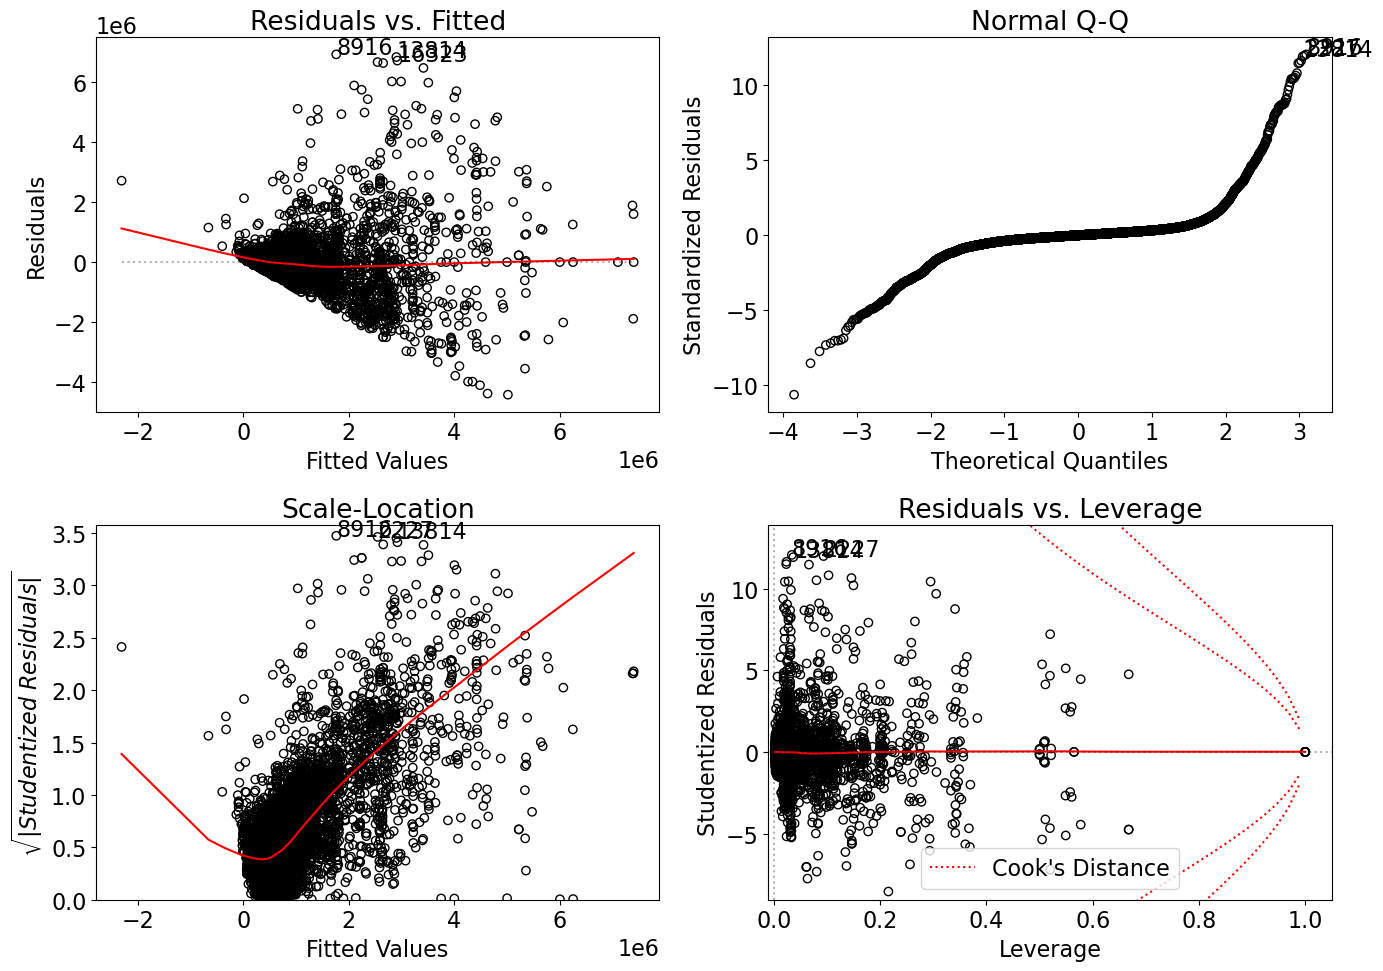

In [248]:
residual_plots(modelLin) #get residual plots of model

In [225]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.37
Elastic Net-Test set score: 0.35


### KNN

In [226]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [227]:
X_train

,const,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxEvaluationYear,...,BldgClass_AtEvaluationTime_S5,BldgClass_AtEvaluationTime_S9,BldgClass_AtEvaluationTime_V0,BldgClass_AtEvaluationTime_V1,BldgClass_AtEvaluationTime_W2,BldgClass_AtEvaluationTime_W3,BldgClass_AtEvaluationTime_W8,BldgClass_AtEvaluationTime_W9,BldgClass_AtEvaluationTime_Z3,BldgClass_AtEvaluationTime_Z9
15228,1.0,1.049341,1.641257,-0.393927,0.013197,-0.058368,-0.144719,-0.043072,1.394170,-0.649179,...,0,0,0,0,0,0,0,0,0,0
8526,1.0,-1.063575,0.059518,-0.172643,-0.103302,-0.058368,-0.110128,-0.153688,-0.383680,-0.649179,...,0,0,0,0,0,0,0,0,0,0
1800,1.0,0.934612,-0.144324,-0.479176,-0.103302,-0.058368,-0.118585,-0.141554,-0.764648,0.458709,...,0,0,0,0,0,0,0,0,0,0
9376,1.0,1.058901,2.211906,-0.455597,-0.103302,-0.058368,-0.108541,-0.157074,-1.230275,-1.757068,...,0,0,0,0,0,0,0,0,0,0
1,1.0,-0.786315,-0.644048,-0.294168,0.129697,-0.058368,-0.148417,-0.036468,1.182521,0.458709,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,1.0,0.930788,-0.084227,1.893283,-0.103302,-0.058368,0.034633,-0.167232,1.309510,0.458709,...,0,0,0,0,0,0,0,0,0,0
9807,1.0,0.670737,0.047337,2.598853,-0.103302,-0.058368,-0.095704,-0.127275,1.563489,0.458709,...,0,0,0,0,0,0,0,0,0,0
14894,1.0,-1.073136,0.681061,-0.453783,-0.103302,-0.058368,-0.135516,-0.086528,0.970872,-0.649179,...,0,0,0,0,0,0,0,0,0,0
4950,1.0,0.959470,-1.157579,-0.459224,0.013197,-0.058368,-0.143767,-0.075805,-1.230275,-1.757068,...,0,0,0,0,0,0,0,0,0,0


In [228]:
scores = get_metrics(y_train,knn_model.predict(X_train),
                     y_test,knn_model.predict(X_test),
                     "Model kNN",scores)
scores


,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Model 1,266818.045202,3.325014e+11,576629.322972,39.177490,2.242132e+08,5.027319e+16,2.242168e+08,44278.382348,0.585698
1,Model kNN,187382.745985,1.861725e+11,431477.110057,27.905937,2.092517e+06,4.650249e+12,2.156444e+06,448.614511,0.768026
2,Model kNN,1893.588765,1.346297e+09,36691.919153,0.526882,3.121528e+06,1.006745e+13,3.172925e+06,661.416373,0.998322
3,Model kNN,154183.837512,1.327861e+11,364398.306473,22.522150,2.206059e+06,5.138173e+12,2.266754e+06,472.311466,0.834546
4,Model kNN,187382.745985,1.861725e+11,431477.110057,27.905937,2.092517e+06,4.650249e+12,2.156444e+06,448.614511,0.768026
5,Model kNN,204614.470766,2.145072e+11,463149.166451,30.657565,1.809914e+06,3.555434e+12,1.885586e+06,389.284772,0.732721
6,Model kNN,215908.371921,2.324625e+11,482143.656447,32.497847,1.559847e+06,2.726662e+12,1.651261e+06,336.043347,0.710348
7,Model kNN,223608.945979,2.462755e+11,496261.558972,33.765437,1.265074e+06,1.926000e+12,1.387804e+06,272.214135,0.693137
8,Model kNN,230524.198849,2.612686e+11,511144.450550,34.696373,1.077046e+06,1.518827e+12,1.232407e+06,230.701968,0.674455
9,Model kNN,236552.322268,2.751645e+11,524561.227791,35.584604,1.235473e+06,1.856604e+12,1.362573e+06,265.737752,0.657141


In [229]:
mape_val = []
for k in range(1,21):
    mod = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    scores = get_metrics(y_train,mod.predict(X_train),
                     y_test,mod.predict(X_test),
                     "Model kNN",scores)

scores


,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Model 1,266818.045202,3.325014e+11,576629.322972,39.177490,2.242132e+08,5.027319e+16,2.242168e+08,44278.382348,0.585698
1,Model kNN,187382.745985,1.861725e+11,431477.110057,27.905937,2.092517e+06,4.650249e+12,2.156444e+06,448.614511,0.768026
2,Model kNN,1893.588765,1.346297e+09,36691.919153,0.526882,3.121528e+06,1.006745e+13,3.172925e+06,661.416373,0.998322
3,Model kNN,154183.837512,1.327861e+11,364398.306473,22.522150,2.206059e+06,5.138173e+12,2.266754e+06,472.311466,0.834546
4,Model kNN,187382.745985,1.861725e+11,431477.110057,27.905937,2.092517e+06,4.650249e+12,2.156444e+06,448.614511,0.768026
5,Model kNN,204614.470766,2.145072e+11,463149.166451,30.657565,1.809914e+06,3.555434e+12,1.885586e+06,389.284772,0.732721
6,Model kNN,215908.371921,2.324625e+11,482143.656447,32.497847,1.559847e+06,2.726662e+12,1.651261e+06,336.043347,0.710348
7,Model kNN,223608.945979,2.462755e+11,496261.558972,33.765437,1.265074e+06,1.926000e+12,1.387804e+06,272.214135,0.693137
8,Model kNN,230524.198849,2.612686e+11,511144.450550,34.696373,1.077046e+06,1.518827e+12,1.232407e+06,230.701968,0.674455
9,Model kNN,236552.322268,2.751645e+11,524561.227791,35.584604,1.235473e+06,1.856604e+12,1.362573e+06,265.737752,0.657141


### Valuating test model

In [230]:
ptest

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013-06-24
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014-08-28
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,2015-01-31
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,2015-03-12
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,2014-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,PR54032,4,NY,UPPER EAST SIDE (79-96),"200 EAST 89TH STREET, 16F",10128,1534,1207,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,13000,638,1983,2,R4,2015-02-21
2932,PR54033,4,NY,UPPER EAST SIDE (79-96),360 EAST 89TH STREET,10128,1551,1165,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,7755,2049,2011,2,R4,2014-06-04
2933,PR54034,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1176,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,1538,2004,2,R4,2014-08-06
2934,PR54035,4,NY,CIVIC CENTER,77 READE STREET,10007,149,1013,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,11670,1497,2005,2,R4,2014-04-30


In [231]:
propts = ptest.drop(['State','Address','TotalNoOfUnits'], axis= 1)
propts['TaxEvaluationYear'] = propts['DateOfEvaluation'].dt.year
propts['BldgClassCategory'] = propts['BldgClassCategory'].apply(format_building_class_category)
propts = propts.drop(columns=['DateOfEvaluation'],axis = 1)
tsdum = propts



In [232]:
propts.Surroundings.value_counts()

FLUSHING-NORTH          119
GREAT KILLS             119
ELTINGVILLE              73
BAYSIDE                  70
CANARSIE                 62
                       ... 
COBBLE HILL               1
BUSH TERMINAL             1
PELHAM PARKWAY SOUTH      1
MARINE PARK               1
HARLEM-UPPER              1
Name: Surroundings, Length: 223, dtype: int64

In [233]:
tsdum

,PropertyID,Borough,Surroundings,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,TaxEvaluationYear
0,PR51101,1,BATHGATE,10457,2929,117,02,2,0,2498,2394,1995,1,B1,2013
1,PR51102,1,BATHGATE,10457,3036,65,02,2,0,2033,2340,1994,1,B1,2014
2,PR51103,1,BATHGATE,10457,3048,51,14,4,1,2500,6000,1963,2,S4,2015
3,PR51104,1,BATHGATE,10457,2899,34,30,0,1,3439,3320,1951,4,E1,2015
4,PR51105,1,EAST TREMONT,10457,3083,40,03,3,0,1348,2931,1997,1,C0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,PR54032,4,UPPER EAST SIDE (79-96),10128,1534,1207,13,1,0,13000,638,1983,2,R4,2015
2932,PR54033,4,UPPER EAST SIDE (79-96),10128,1551,1165,13,1,0,7755,2049,2011,2,R4,2014
2933,PR54034,4,CIVIC CENTER,10007,123,1176,13,1,0,29715,1538,2004,2,R4,2014
2934,PR54035,4,CIVIC CENTER,10007,149,1013,13,1,0,11670,1497,2005,2,R4,2014


In [234]:
tsdum = pd.get_dummies(propdum,drop_first=True,dtype='int8')


In [235]:
Xt = tsdum.drop(['PropertyEvaluationvalue'],axis=1)
num_vars = ['ZipCode', 'Lot','Block',
       'NoOfResidentialUnits', 'NoOfCommercialUnits',
       'LandAreaInSqFt', 'GrossAreaInSqFt', 'YearOfConstruction',
       'TaxEvaluationYear']
Xt[num_vars] = scaler.fit_transform(Xt[num_vars])
Xt= sm.add_constant(Xt)
Xt['PropertyEvaluationvalue'] = knn_model.predict(Xt)

In [236]:
Xt

,const,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxEvaluationYear,...,BldgClass_AtEvaluationTime_S9,BldgClass_AtEvaluationTime_V0,BldgClass_AtEvaluationTime_V1,BldgClass_AtEvaluationTime_W2,BldgClass_AtEvaluationTime_W3,BldgClass_AtEvaluationTime_W8,BldgClass_AtEvaluationTime_W9,BldgClass_AtEvaluationTime_Z3,BldgClass_AtEvaluationTime_Z9,PropertyEvaluationvalue
0,1.0,-0.793580,-0.674171,-0.256871,0.017163,-0.063032,-0.154604,-0.074856,0.677776,0.454269,...,0,0,0,0,0,0,0,0,0,5.730000e+05
1,1.0,-0.791668,-0.644521,-0.288213,0.141734,-0.063032,-0.158253,-0.035344,1.185565,0.454269,...,0,0,0,0,0,0,0,0,0,6.554600e+05
2,1.0,-0.791668,-0.678214,-0.205249,0.017163,-0.063032,-0.152891,-0.074487,0.635460,0.454269,...,0,0,0,0,0,0,0,0,0,5.200000e+05
3,1.0,-0.791668,-0.673632,-0.243965,0.017163,-0.063032,-0.146792,-0.074856,0.720092,0.454269,...,0,0,0,0,0,0,0,0,0,5.896667e+05
4,1.0,-0.791668,-0.644791,-0.232903,0.017163,-0.063032,-0.129833,-0.080141,0.804723,1.566292,...,0,0,0,0,0,0,0,0,0,5.180720e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,1.0,-1.652119,-1.429982,1.745327,-0.107408,-0.063032,0.321889,-0.049723,1.270196,0.454269,...,0,0,0,0,0,0,0,0,0,8.176521e+06
16806,1.0,-1.640647,-1.415696,1.452187,-0.107408,-0.063032,0.027291,-0.083582,1.227880,0.454269,...,0,0,0,0,0,0,0,0,0,5.375000e+06
16807,1.0,-1.640647,-1.415696,1.540682,-0.107408,-0.063032,0.027291,-0.088191,1.227880,0.454269,...,0,0,0,0,0,0,0,0,0,5.375000e+06
16808,1.0,-1.130112,-1.458824,3.655342,-0.107408,-0.063032,0.029449,-0.185467,0.296935,0.454269,...,0,0,0,0,0,0,0,0,0,5.741667e+05


In [244]:
Final_DF = pd.DataFrame(ptrain['PropertyID'])
Final_DF['PropertyEvaluationvalue'] = Xt['PropertyEvaluationvalue']

In [245]:
Final_DF

,PropertyID,PropertyEvaluationvalue
0,PR11101,1.146000e+06
1,PR11102,1.310920e+06
2,PR11103,1.040000e+06
3,PR11104,1.179333e+06
4,PR11105,1.036144e+06
...,...,...
16805,PR27906,1.635304e+07
16806,PR27907,1.075000e+07
16807,PR27908,1.075000e+07
16808,PR27909,1.148333e+06


In [246]:
Final_DF.to_csv('Submission.csv')